##Kaggle

In [1]:
#https://www.kaggle.com/paultimothymooney/blood-cells
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 5.4MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=cfb174a5ca2edecd80a5ad653c018c986eed993c5e7987dc35e09e5e0e059dae
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bluecoder1206","key":"68dcf0f9521940e72f2268bd6739a6e9"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d paultimothymooney/blood-cells

100% 108M/108M [00:02<00:00, 26.0MB/s] 
100% 108M/108M [00:02<00:00, 42.0MB/s]


In [6]:
!unzip blood-cells.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8050.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: dataset/dataset2-

##CNN

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
training_path="/content/dataset/dataset2-master/dataset2-master/images/TRAIN"
test_path="/content/dataset/dataset2-master/dataset2-master/images/TEST"

In [9]:
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(training_path,image_size=(200,200),batch_size=32)

Found 9957 files belonging to 4 classes.


In [10]:
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(test_path,image_size=(200,200),batch_size=32)

Found 2487 files belonging to 4 classes.


In [11]:
pretrained_model = tf.keras.applications.ResNet50( include_top=False,weights="imagenet",input_shape=(200,200,3))

94773248/94765736 [==============================] - 1s 0us/step


In [12]:
pretrained_model.trainable = False

In [19]:
CNNmodel = tf.keras.models.Sequential()

CNNmodel.add(pretrained_model)
CNNmodel.add(tf.keras.layers.GlobalAveragePooling2D())

# Neural Network - For classification
#CNNmodel.add(tf.keras.layers.Flatten())
CNNmodel.add(tf.keras.layers.Dense(64, activation='relu'))
CNNmodel.add(tf.keras.layers.Dropout(0.5))
CNNmodel.add(tf.keras.layers.Dense(32, activation='relu'))
CNNmodel.add(tf.keras.layers.Dropout(0.3))
CNNmodel.add(tf.keras.layers.Dense(4,activation='softmax'))



In [20]:
CNNmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                131136    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                

In [21]:
CNNmodel.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ['accuracy'])

In [22]:
history = CNNmodel.fit(train_dataset, validation_data=test_dataset, epochs = 10 )

Epoch 1/10
312/312 [==============================] - 94s 289ms/step - loss: 1.4050 - accuracy: 0.3024 - val_loss: 1.2565 - val_accuracy: 0.5203
Epoch 2/10
312/312 [==============================] - 89s 285ms/step - loss: 1.2301 - accuracy: 0.4029 - val_loss: 1.1373 - val_accuracy: 0.5223
Epoch 3/10
312/312 [==============================] - 89s 284ms/step - loss: 1.1352 - accuracy: 0.4571 - val_loss: 1.1573 - val_accuracy: 0.4893
Epoch 4/10
312/312 [==============================] - 89s 285ms/step - loss: 1.1117 - accuracy: 0.4619 - val_loss: 1.1378 - val_accuracy: 0.4861
Epoch 5/10
312/312 [==============================] - 89s 285ms/step - loss: 1.0145 - accuracy: 0.5001 - val_loss: 0.9945 - val_accuracy: 0.6128
Epoch 6/10
312/312 [==============================] - 89s 284ms/step - loss: 0.9566 - accuracy: 0.5283 - val_loss: 0.9975 - val_accuracy: 0.5810
Epoch 7/10
312/312 [==============================] - 89s 285ms/step - loss: 0.9221 - accuracy: 0.5562 - val_loss: 1.1028 - val_ac

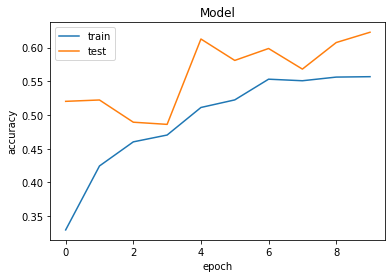

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

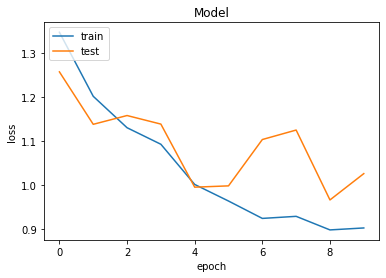

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()